<a id="intro"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h2>

<h3>   
      <font color = black >
            <span style='font-family:Georgia'>
            Introduction:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    In the age of digital platforms, customer reviews are a valuable resource for understanding user sentiment towards products and services. Sentiment analysis, a subfield of Natural Language Processing (NLP), involves analyzing text to determine whether the sentiments expressed are positive, negative, or neutral. In this project, we perform sentiment analysis on Amazon Alexa reviews to gauge customer feedback and classify their sentiments. By leveraging machine learning techniques, we aim to build an automated system that can categorize these reviews into positive or negative sentiments.
    </span>
</p>   
<hr>
<h3>   
      <font color = black >
            <span style='font-family:Georgia'>
            Business Understanding:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
   Amazon Alexa is one of the most popular voice-activated virtual assistants, used in millions of homes and businesses globally. The vast amount of customer feedback about Alexa products can provide critical insights into customer satisfaction, areas for improvement, and overall product performance. Analyzing the sentiment behind these reviews helps Amazon and other stakeholders understand how customers perceive the product, respond to feature updates, and handle issues.

By analyzing the reviews at scale, businesses can identify trends, common complaints, or features that delight users. This information is valuable for product teams, marketing, and customer service to align their efforts with customer needs and expectations.
    </span>
</p>   
<hr>
<h3>   
      <font color = black >
            <span style='font-family:Georgia'>
            Business Objective:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
The primary objective of this machine learning project is to build a sentiment analysis model that can accurately classify Amazon Alexa reviews into positive or negative categories. The goals are:

<li><b>Automate Sentiment Classification:</b> Use machine learning algorithms to automatically detect whether a review is positive or negative.</li>
<li><b>Provide Actionable Insights:</b> Help the product and marketing teams understand customer feedback at scale, enabling them to address common complaints or leverage positive feedback in marketing campaigns.</li>
<li><b>Improve Customer Experience:</b> By identifying recurring issues or popular features, the insights from sentiment analysis can guide product improvements and customer support efforts, ultimately enhancing the customer experience with Alexa products.</li>
  </span>
</p>  
<u1>
This project will provide actionable insights into customer opinions and help Amazon drive improvements in product quality, marketing strategies, and customer satisfaction.
</u1>



<a id="libraries"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2. Getting Jupyter Ready:
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = black >
            <span style='font-family:Georgia'>
            2.1 Import Python Libraries:
            </span>   
        </font>    
</h3>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="import"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

<a id="input"></a>
<h3 name='libraries'>   
      <font color = black >
            <span style='font-family:Georgia'>
            3.1 Importing the input files
            </span>   
        </font>    
</h3>

In [ ]:
df=pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


<a id="input"></a>
<h3 name='libraries'>   
      <font color = black >
            <span style='font-family:Georgia'>
            3.2 Checking for null values
            </span>   
        </font>    
</h3>

In [ ]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [ ]:
df[df['verified_reviews'].isnull()]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [ ]:
df=df.dropna()

In [ ]:
df.shape

(3149, 5)

In [ ]:
df['length']=df['verified_reviews'].apply(len)

<ipython-input-8-e088abb7b105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length']=df['verified_reviews'].apply(len)


In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [ ]:
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

<a id="input"></a>
<h3 name='libraries'>   
      <font color = black >
            <span style='font-family:Georgia'>
            3.3 Analyzing and Visualizing distribution of the features
            </span>   
        </font>    
</h3>

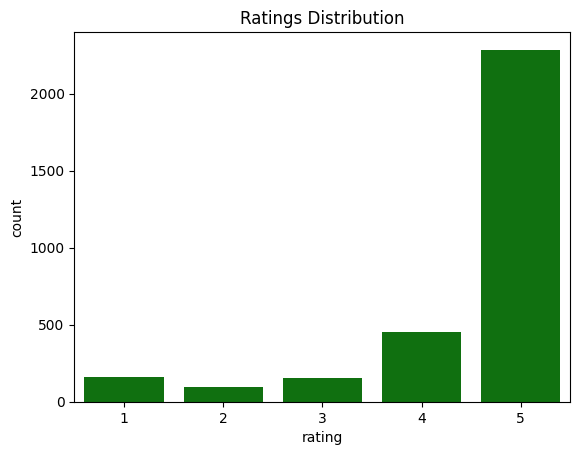

In [ ]:
sns.countplot(data=df,x='rating',color='green')
plt.title('Ratings Distribution');

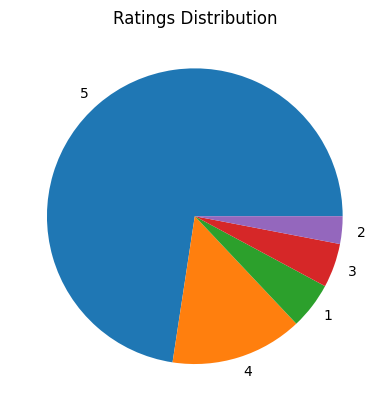

In [ ]:
plt.pie(df['rating'].value_counts(),labels=df['rating'].value_counts().index)
plt.title('Ratings Distribution');
#plt.legend(title='ratings');

In [ ]:
df['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [ ]:
#df[df['feedback']==1]
#df[df['feedback']==1]

<Axes: xlabel='feedback', ylabel='count'>

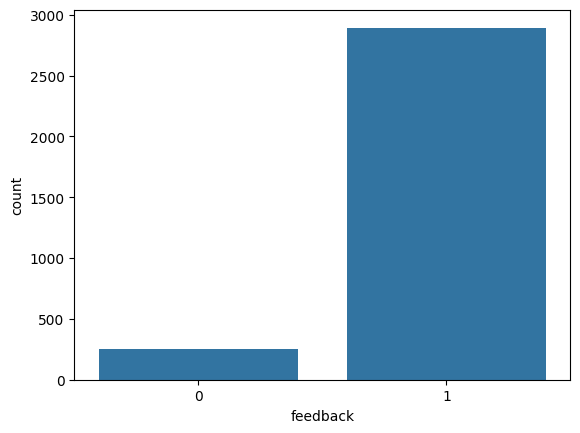

In [ ]:
sns.countplot(data=df,x='feedback')

Text(0.5, 1.0, 'Feedback Distribution')

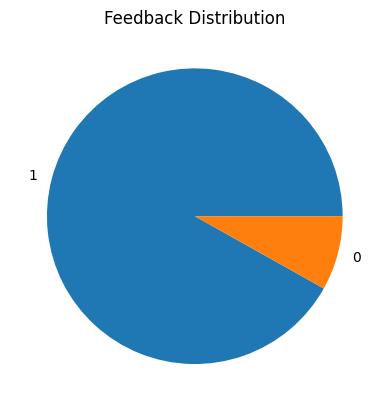

In [ ]:
plt.pie(df['feedback'].value_counts(),labels=df['feedback'].value_counts().index)
plt.title('Feedback Distribution')

In [ ]:
df[df['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [ ]:
df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

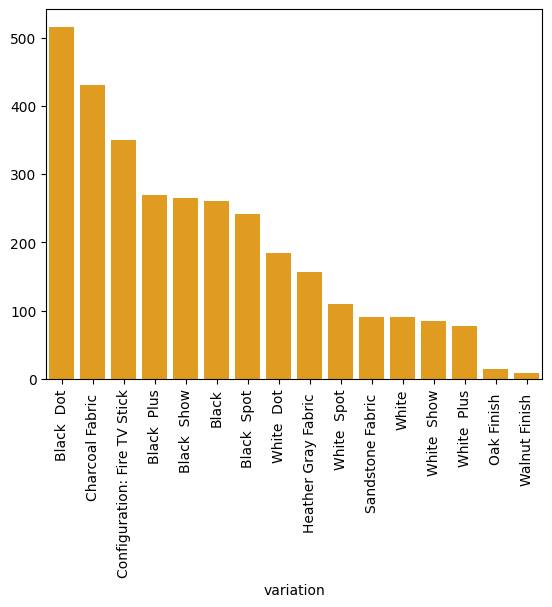

In [ ]:
sns.barplot(x=df['variation'].value_counts().index,y=df['variation'].value_counts().values,color='orange')
plt.xticks(rotation=90);

In [ ]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

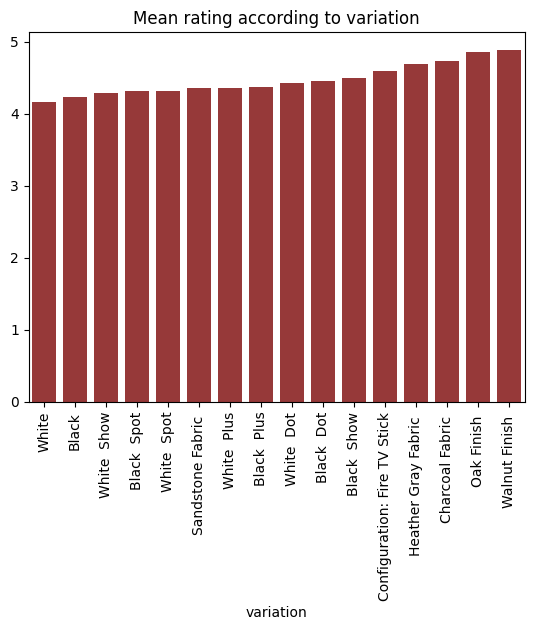

In [ ]:
sns.barplot(x=df.groupby('variation')['rating'].mean().sort_values().index,y=df.groupby('variation')['rating'].mean().sort_values().values,color='brown')
plt.xticks(rotation=90)
plt.title('Mean rating according to variation');

In [ ]:
df['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

<Axes: xlabel='length', ylabel='Count'>

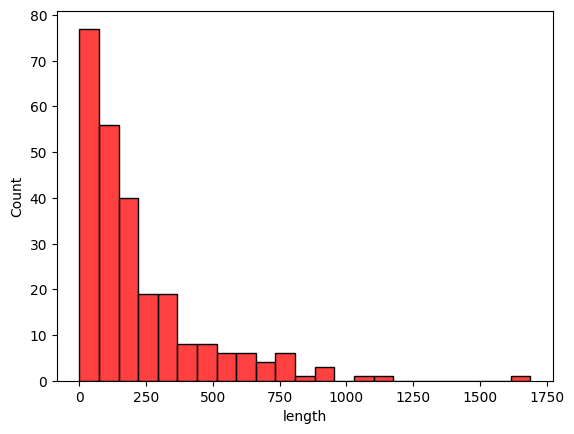

In [ ]:
sns.histplot(df[df['feedback']==0]['length'],color='red')

<Axes: xlabel='length', ylabel='Count'>

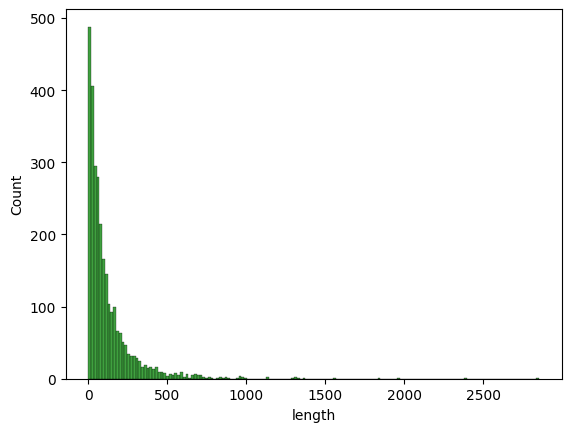

In [ ]:
sns.histplot(df[df['feedback']==1]['length'],color='green')

In [ ]:
df.groupby('length')['rating'].mean()

length
1       3.716049
2       5.000000
3       4.000000
4       4.785714
5       4.823529
          ...   
1688    2.000000
1835    3.000000
1956    3.000000
2395    5.000000
2853    5.000000
Name: rating, Length: 495, dtype: float64

<Axes: xlabel='rating', ylabel='Count'>

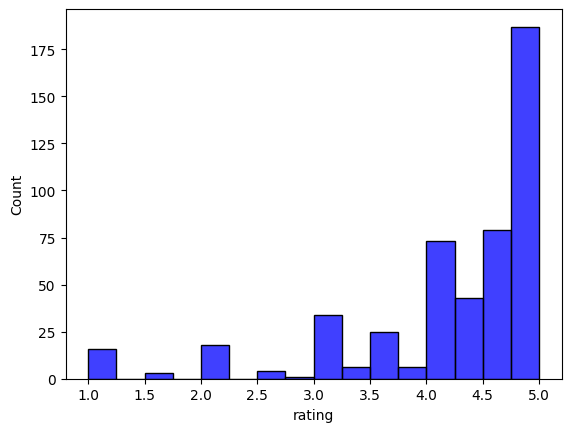

In [ ]:
sns.histplot(df.groupby('length')['rating'].mean(),color='blue')

<a id="import"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3. Feature Engineering
            </span>   
        </font>    
</h2>

<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = black >
            <span style='font-family:Georgia'>
            3.1 Using wordcloud to identify top positive and negative sentiment words
            </span>   
        </font>    
</h3>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
reviews=" ".join([review for review in df['verified_reviews']])

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc=WordCloud(background_color='white',max_words=50)

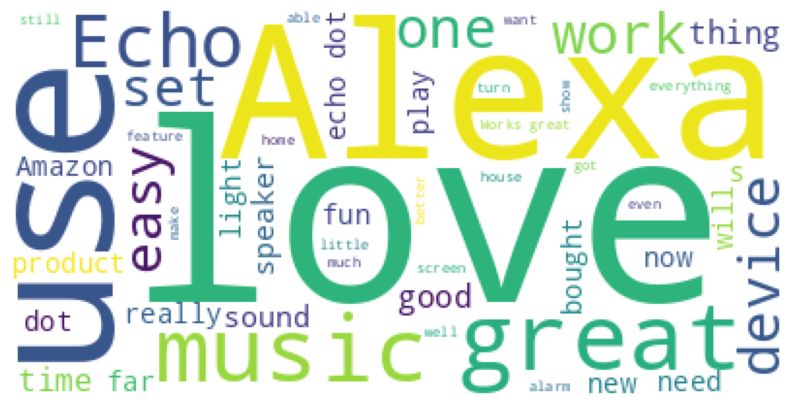

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.axis('off');

In [ ]:
neg_reviews=" ".join([x for x in df[df['feedback']==0]['verified_reviews']])
neg_reviews=neg_reviews.lower().split()

pos_reviews=" ".join([x for x in df[df['feedback']==1]['verified_reviews']])
pos_reviews=pos_reviews.lower().split()

unique_neg=[x for x in neg_reviews if x not in pos_reviews]
unique_neg=" ".join(unique_neg)

unique_pos=[x for x in pos_reviews if x not in neg_reviews]
unique_pos=" ".join(unique_pos)

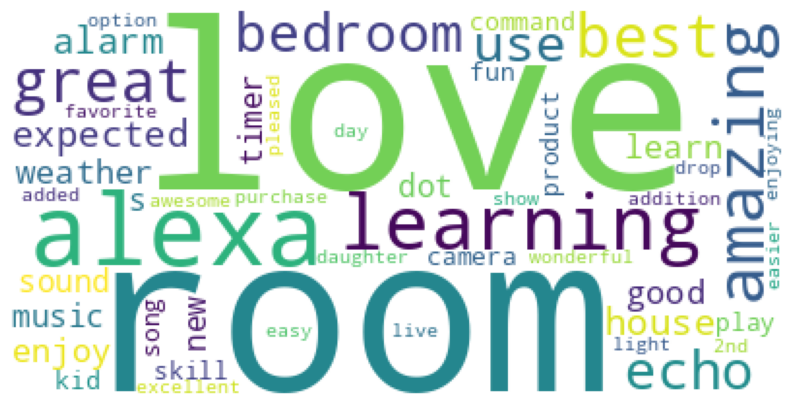

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_pos))
plt.axis('off');

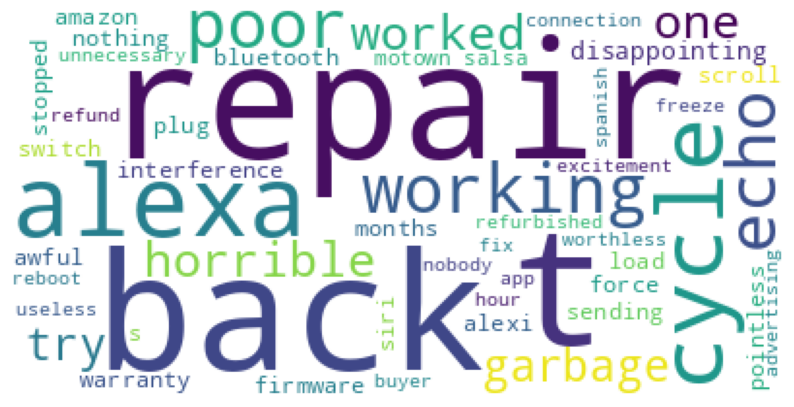

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_neg))
plt.axis('off');

<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = black >
            <span style='font-family:Georgia'>
            3.3 Using NLP
            </span>   
        </font>    
</h3>

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string

In [ ]:
ps=PorterStemmer()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y.copy()
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y.copy()
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
df['transf_reviews']=df['verified_reviews'].apply(transform_text)

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length,transf_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197,sometim play game answer question correctli al...
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174,lot fun thing 4 yr old learn dinosaur control ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music


<a id="clean"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5. Fitting the model
            </span>   
        </font>    
</h2>

<a id="null"></a>
<h3>   
      <font color = black >
            <span style='font-family:Georgia'>
            5.1 Train-Test split
            </span>   
        </font>    
</h3>

In [ ]:
cv=CountVectorizer(max_features=2500,stop_words='english')

In [ ]:
X=df['transf_reviews']
y=df['feedback']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test)

In [ ]:
X.shape

(3149,)

In [ ]:
y.shape

(3149,)

<a id="null"></a>
<h3>   
      <font color = black >
            <span style='font-family:Georgia'>
            5.2 Fitting of various classification models
            </span>   
        </font>    
</h3>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [ ]:
nb=MultinomialNB()
log_model=LogisticRegression()
svc=SVC()
linear_svc=LinearSVC()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()

In [ ]:
def model_perf(model):
  model.fit(X_train_cv,y_train)
  preds=model.predict(X_test_cv)
  print(classification_report(y_test,preds))
  ConfusionMatrixDisplay.from_estimator(model,X_test_cv,y_test)

              precision    recall  f1-score   support

           0       0.72      0.28      0.40        47
           1       0.94      0.99      0.97       583

    accuracy                           0.94       630
   macro avg       0.83      0.63      0.68       630
weighted avg       0.93      0.94      0.93       630



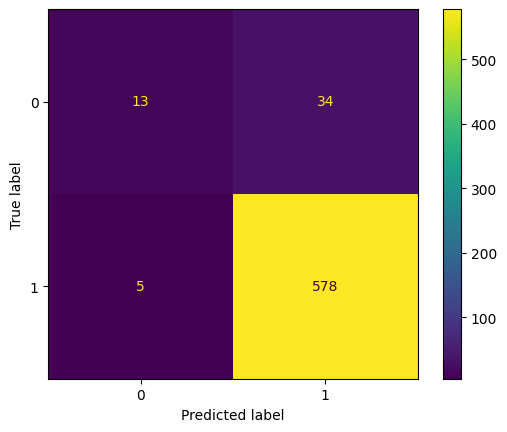

In [ ]:
model_perf(nb)

              precision    recall  f1-score   support

           0       0.80      0.26      0.39        47
           1       0.94      0.99      0.97       583

    accuracy                           0.94       630
   macro avg       0.87      0.63      0.68       630
weighted avg       0.93      0.94      0.92       630



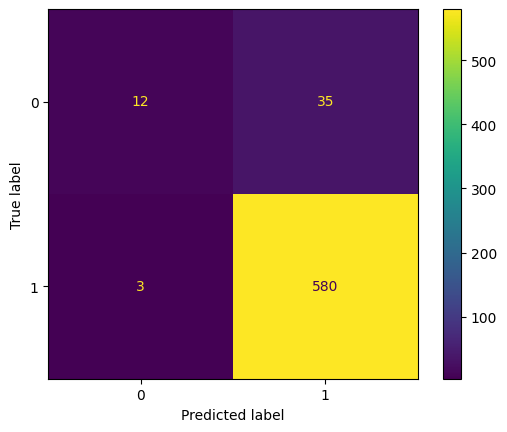

In [ ]:
model_perf(log_model)

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        47
           1       0.93      1.00      0.96       583

    accuracy                           0.93       630
   macro avg       0.96      0.51      0.50       630
weighted avg       0.93      0.93      0.89       630



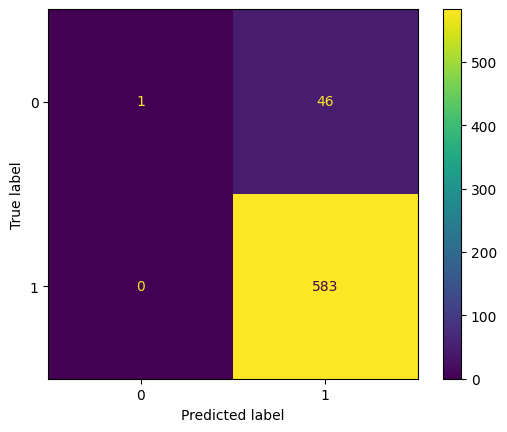

In [ ]:
model_perf(svc)

              precision    recall  f1-score   support

           0       0.62      0.45      0.52        47
           1       0.96      0.98      0.97       583

    accuracy                           0.94       630
   macro avg       0.79      0.71      0.74       630
weighted avg       0.93      0.94      0.93       630



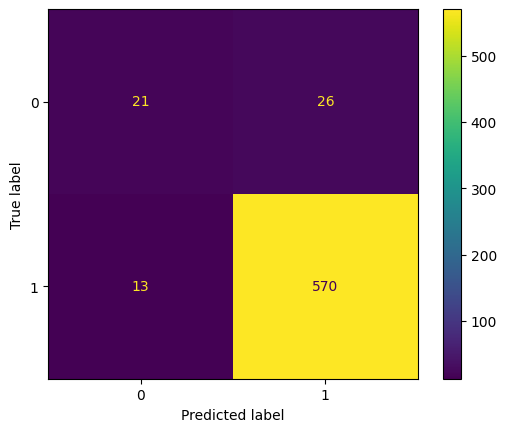

In [ ]:
model_perf(linear_svc)

              precision    recall  f1-score   support

           0       0.60      0.55      0.58        47
           1       0.96      0.97      0.97       583

    accuracy                           0.94       630
   macro avg       0.78      0.76      0.77       630
weighted avg       0.94      0.94      0.94       630



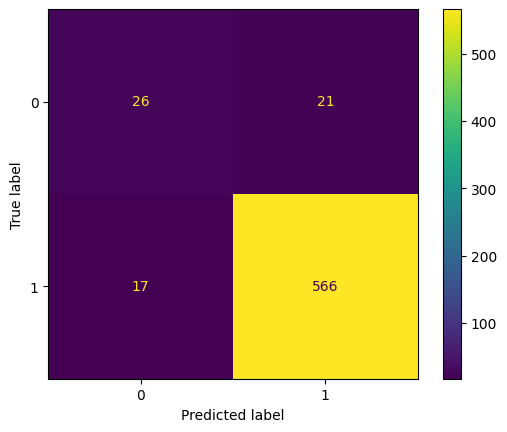

In [ ]:
model_perf(dtc)

              precision    recall  f1-score   support

           0       0.83      0.21      0.34        47
           1       0.94      1.00      0.97       583

    accuracy                           0.94       630
   macro avg       0.89      0.60      0.65       630
weighted avg       0.93      0.94      0.92       630



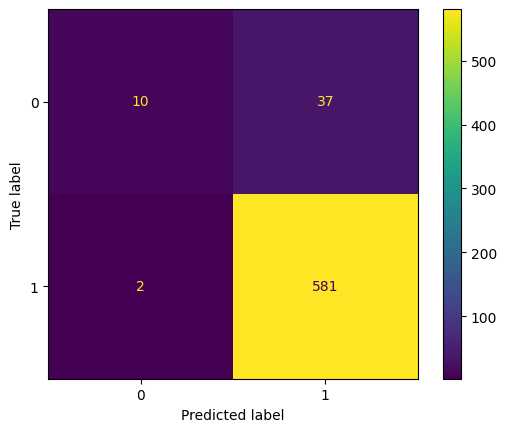

In [ ]:
model_perf(rfc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      0.99      0.96       583

    accuracy                           0.91       630
   macro avg       0.46      0.49      0.48       630
weighted avg       0.86      0.91      0.88       630



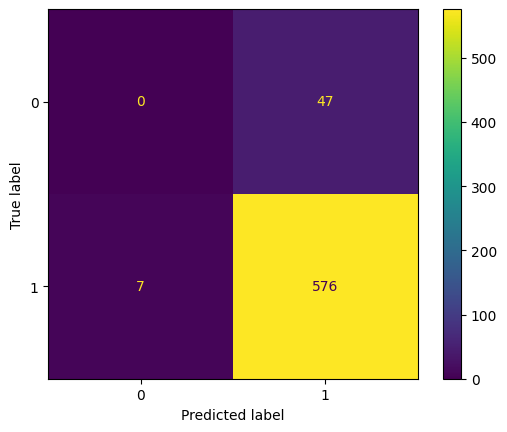

In [ ]:
model_perf(knn)

<a id="null"></a>
<h3>   
      <font color = black >
            <span style='font-family:Georgia'>
            5.3 Using Grid search for optimal hyperparameters
            </span>   
        </font>    
</h3>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [ ]:
param_grid={'criterion':['gini','entropy','log_loss'],'max_depth':[6,10,50,100],'class_weight':['balanced']}

In [ ]:
grid=GridSearchCV(dtc,param_grid)

In [ ]:
grid.fit(X_train_cv,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [6, 10, 50, 100]})

In [ ]:
grid.best_params_

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 100}

In [ ]:
grid_preds=grid.predict(X_test_cv)

In [ ]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           0       0.28      0.60      0.38        47
           1       0.96      0.88      0.92       583

    accuracy                           0.86       630
   macro avg       0.62      0.74      0.65       630
weighted avg       0.91      0.86      0.88       630



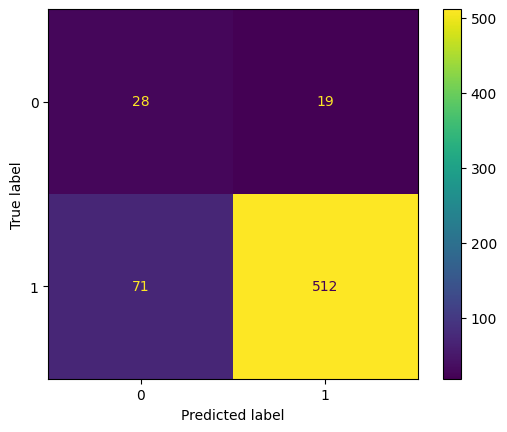

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid,X_test_cv,y_test)

In [ ]:
help(LinearSVC)

Help on class LinearSVC in module sklearn.svm._classes:

class LinearSVC(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : {'l1', 'l2'}, default='l2'
 |      Specifies t

In [ ]:
param_grid={'penalty':['l1','l2'],'C':[0.001,0.01,0.1,0.5,1,2],'class_weight':['balanced',None],'loss':['hinge', 'squared_hinge']}

In [ ]:
grid2=GridSearchCV(linear_svc,param_grid)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

              precision    recall  f1-score   support

           0       0.70      0.45      0.55        47
           1       0.96      0.98      0.97       583

    accuracy                           0.94       630
   macro avg       0.83      0.72      0.76       630
weighted avg       0.94      0.94      0.94       630



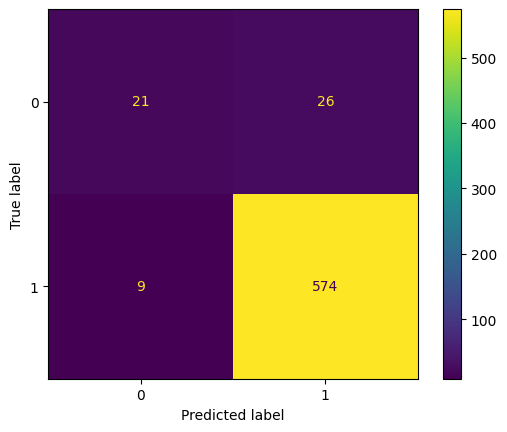

In [ ]:
model_perf(grid2)

In [ ]:
grid2.best_params_

{'C': 0.5, 'class_weight': None, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [ ]:
param_grid={'bootstrap': [True,False],'max_features': ["sqrt", "log2", None],'n_estimators': [50,100,150],'class_weight':["balanced", "balanced_subsample",None]}

In [ ]:
#help(RandomForestClassifier)

In [ ]:
grid3=GridSearchCV(rfc,param_grid)

              precision    recall  f1-score   support

           0       0.86      0.26      0.39        47
           1       0.94      1.00      0.97       583

    accuracy                           0.94       630
   macro avg       0.90      0.63      0.68       630
weighted avg       0.94      0.94      0.93       630



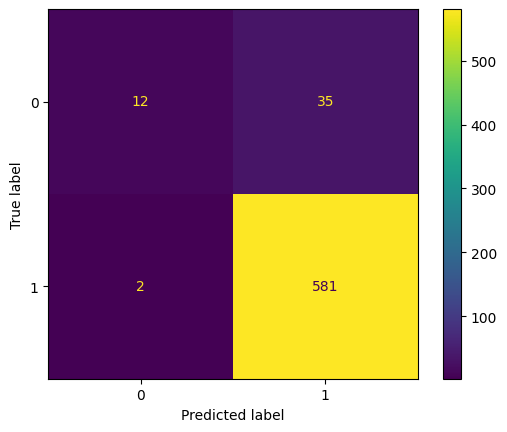

In [ ]:
model_perf(grid3)

In [ ]:
grid3.best_params_

{'bootstrap': True,
 'class_weight': None,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [ ]:
solve_discrete_aremodel=LinearSVC(C=0.5,loss='squared_hinge',penalty='l2')

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe=Pipeline([('cv',CountVectorizer(max_features=2500,stop_words='english')),('linear_svc',LinearSVC(C=0.5,loss='squared_hinge',penalty='l2'))])

In [ ]:
pipe.fit(X,y)

Pipeline(steps=[('cv',
                 CountVectorizer(max_features=2500, stop_words='english')),
                ('linear_svc', LinearSVC(C=0.5))])

In [ ]:
pipe.predict(['I love this'])

array([1])

In [ ]:
linear_svc=LinearSVC(C=0.5,loss='squared_hinge',penalty='l2')

In [ ]:
linear_svc.fit(X_train_cv,y_train)

LinearSVC(C=0.5)

In [ ]:
linear_svc.score(X_train_cv,y_train)

0.9908693926161175

In [ ]:
preds=linear_svc.predict(X_test_cv)

In [ ]:
linear_svc.score(X_test_cv,y_test)

0.9444444444444444

In [ ]:
dtc=DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=100)

In [ ]:
pipe=Pipeline([('cv',CountVectorizer(max_features=2500,stop_words='english')),('dtc',DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=100))])

In [ ]:
pipe.fit(X,y)

Pipeline(steps=[('cv',
                 CountVectorizer(max_features=2500, stop_words='english')),
                ('dtc',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=100))])

In [ ]:
pipe.predict(['I hate it'])

array([0])

In [ ]:
pipe.predict(['I love it'])

array([1])

<a id="conclusion"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            7. Conclusions
            </span>   
        </font>    
</h2>

<p>
    <span style='font-family:Georgia'>
The sentiment analysis of Amazon Alexa reviews successfully provided valuable insights into customer feedback by classifying sentiments as positive or negative. A Decision Tree classifier was employed to build the model, offering a transparent and interpretable approach to sentiment classification. By leveraging this machine learning technique, we automated the sentiment analysis process, enabling quick and accurate classification of large volumes of review data.
        </p>
    <p>
The use of the Decision Tree model allowed us to identify key trends, recurring issues, and popular features in the feedback, which can drive product improvements, enhance customer support, and inform marketing strategies. Overall, the project demonstrates how machine learning can transform customer reviews into actionable insights, helping Amazon improve user satisfaction and optimize product development based on real customer sentiments.
    </span>
</p>